# 🚗 Car Price Prediction Using Machine Learning

## 🧾 Introduction

The aim of this project is to build a machine learning model that predicts the price of a car based on various features such as manufacturer, engine size, mileage, fuel type, and more. This involves a series of structured steps, from data understanding and cleaning to model training, evaluation, and interpretation.

### 🧠 Objectives

- Understand the dataset and clean any inconsistencies
- Perform exploratory data analysis (EDA) to understand data relationships
- Build and train a machine learning pipeline
- Evaluate the model using multiple performance metrics

## 🧪 Step 1: Load and Understand the Dataset

### 🔍 What to Do:
- Load the data
- Display the first few rows
- Check data types, null values, and unique va

In [2]:
import pandas as pd

df = pd.read_csv('car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

# 🧹 Step 2: Data Cleaning and Preprocessing

In [4]:
# Drop bad columns
import numpy as np
df.drop(columns=['ID','Doors'])

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Left wheel,Black,4


In [5]:
# Fix Levy
df['Levy'] = df['Levy'].replace('-', np.nan).astype(float)
df['Levy'] = df['Levy'].fillna(df['Levy'].median()).astype(int)

df['Price']=df['Price'].astype(int)

In [6]:

# Fix Mileage
df['Mileage'] = df['Mileage'].str.replace(' km', '').str.replace(',', '').astype(int)


In [7]:
# Fix Engine Volume
df['Engine volume'] = df['Engine volume'].str.extract(r'(\d+\.\d+|\d+)').astype(float)


In [8]:
# Binary encode Leather interior
df['Leather interior'] = df['Leather interior'].map({'Yes': 1, 'No': 0})

# 📊 Step 3: Exploratory Data Analysis (EDA)
🔍 What to Do:
Plot histograms, boxplots, scatterplots, and bar plots

Visualize relationships between features and price

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df['Price'].describe()

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64

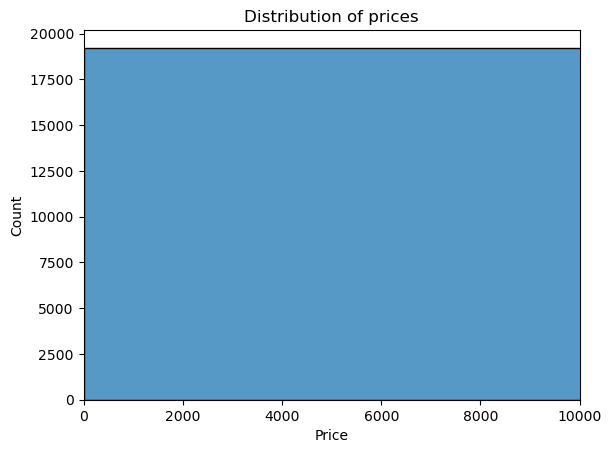

In [11]:
#Price distribution
sns.histplot(df['Price'],bins=10)
plt.xlim(0, 10000)
plt.title('Distribution of prices')
plt.show()

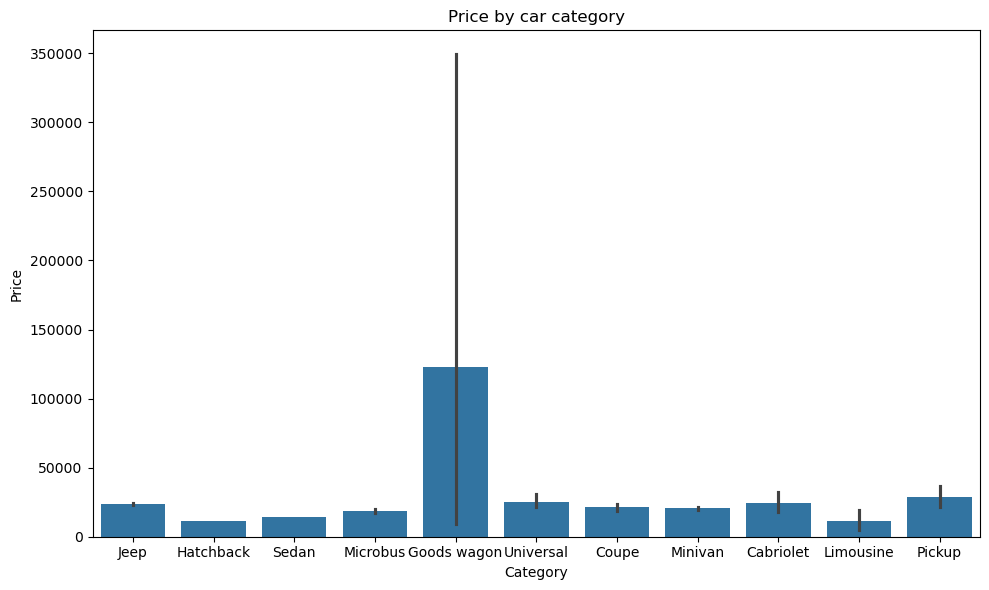

In [12]:
#Category vs price
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Category',y='Price')
plt.title('Price by car category')
plt.tight_layout()
plt.show()


# 🧠 Step 4: Feature Engineering 
🔍 What to Do:
-Convert  year to car age

-Encode categorical variables

-Create new features if needed

In [13]:
df['Age']=2025-df['Prod. year']
df['Mileage_per_year']=df['Mileage']/df['Age']

# 🧪 Step 5: Split Data and Prepare for Modeling
🔍 What to Do:
Define features (X) and target (y)

Distinguish numerical and categorical columns

Train-test split

Build preprocessing pipeline

In [14]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [15]:

X = df.drop(columns=['ID', 'Price'])
y = df['Price']
                  

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)
categorical = X_train.select_dtypes(include='object').columns.tolist()
numerical = X_train.select_dtypes(exclude='object').columns.tolist()
print("Categorical:", categorical)
print("Numerical:", numerical)


Categorical: ['Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']
Numerical: ['Levy', 'Prod. year', 'Leather interior', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Age', 'Mileage_per_year']


# 🤖 Step 6: Model Training
🔍 What to Do:
Choose models 

Train using pipeline

1. Define function to:
Train a model

Predict

Evaluate using metrics like MAE, MSE, RMSE, and R²

2. Create a list/dictionary of models to test
3. Loop through models and collect their evaluation results

In [28]:
pip install xgboost


   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/149.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/149.9 MB 3.6 MB/s eta 0:00:42
    --------------------------------------- 2.6/149.9 MB 5.6 MB/s eta 0:00:27
   - -------------------------------------- 5.0/149.9 MB 7.2 MB/s eta 0:00:21
   - -------------------------------------- 7.3/149.9 MB 8.2 MB/s eta 0:00:18
   -- ------------------------------------- 9.7/149.9 MB 8.9 MB/s eta 0:00:16
   --- ------------------------------------ 12.1/149.9 MB 9.3 MB/s eta 0:00:15
   --- ------------------------------------ 14.4/149.9 MB 9.5 MB/s eta 0:00:15
   ---- ----------------------------------- 16.0/149.9 MB 9.5 MB/s eta 0:00:15
   ---- ----------------------------------- 16.5/149.9 MB 9.0 MB/s eta 0:00:15
   ---- ----------------------------------- 17.0/149.9 MB 8.3 MB/s eta 0:00:16
  

In [17]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor


In [18]:
numeric_transformer=Pipeline(steps=[('imputer',SimpleImputer()),('scaler',StandardScaler())])
categorical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder(handle_unknown='ignore'))])
preprocessor=ColumnTransformer(transformers=[('num',numeric_transformer,numerical),('cat',categorical_transformer,categorical)])

In [19]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)

}

In [20]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    # build fresh pipeline for this model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print(f"📊 {name}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("-" * 30)

In [21]:
print(y.dtype)  # should be int or float
print(y.head())  # should show price numbers like 12000, 34500, etc.


int32
0    13328
1    16621
2     8467
3     3607
4    11726
Name: Price, dtype: int32


In [22]:
# 1. Target should be numeric
print("y_train dtype:", y_train.dtype)
print("y_train sample:", y_train.head())

# 2. No string sneaking into y by mistake
print("Unique sample of y_train (first 20):", pd.Series(y_train).unique()[:20])

# 3. Features: which are categorical vs numeric
print("Categorical cols:", [c for c in X_train.columns if X_train[c].dtype == 'object'])
print("Numerical cols:", [c for c in X_train.columns if X_train[c].dtype in ['int64', 'float64']])

# 4. Show a few rows to see raw values
print(X_train.iloc[:3].to_dict(orient='records'))


y_train dtype: int32
y_train sample: 8891      58018
16355     21739
7564       7840
7997     147397
17188       314
Name: Price, dtype: int32
Unique sample of y_train (first 20): [ 58018  21739   7840 147397    314  10036  13172  25089  10976  56136
   4234  19757  27284   2038   8500  16900   3450  13476    941  26971]
Categorical cols: ['Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']
Numerical cols: ['Prod. year', 'Leather interior', 'Engine volume', 'Cylinders', 'Airbags', 'Age', 'Mileage_per_year']
[{'Levy': 781, 'Manufacturer': 'TOYOTA', 'Model': 'RAV 4 LIMITED', 'Prod. year': 2016, 'Category': 'Jeep', 'Leather interior': 1, 'Fuel type': 'Hybrid', 'Engine volume': 2.5, 'Mileage': 53000, 'Cylinders': 4.0, 'Gear box type': 'Tiptronic', 'Drive wheels': '4x4', 'Doors': '04-May', 'Wheel': 'Left wheel', 'Color': 'Blue', 'Airbags': 12, 'Age': 9, 'Mileage_per_year': 5888.888888888889}, {'Levy': 707, 'Manufacturer': 'SSANGYONG'

In [23]:
# Show what y_train is
print(type(y_train))
print(y_train.head())


<class 'pandas.core.series.Series'>
8891      58018
16355     21739
7564       7840
7997     147397
17188       314
Name: Price, dtype: int32


In [24]:
for name, model in models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

📊 Linear Regression
MAE: 14512.41
MSE: 2558488923.33
RMSE: 50581.51
R² Score: -4.61
------------------------------
📊 Ridge Regression
MAE: 14001.31
MSE: 2391327431.91
RMSE: 48901.20
R² Score: -4.24
------------------------------
📊 Decision Tree
MAE: 12222.30
MSE: 179910393322.77
RMSE: 424158.45
R² Score: -393.31
------------------------------
📊 Random Forest
MAE: 6013.38
MSE: 9661740730.06
RMSE: 98294.15
R² Score: -20.18
------------------------------
📊 XGBoost
MAE: 6843.83
MSE: 209366220.98
RMSE: 14469.49
R² Score: 0.54
------------------------------
